In [21]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [22]:
import PIL

In [23]:
from os import listdir
from os.path import isfile, join

In [24]:
from keras.datasets import mnist

In [25]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [26]:
Xtr.shape

(60000, 28, 28)

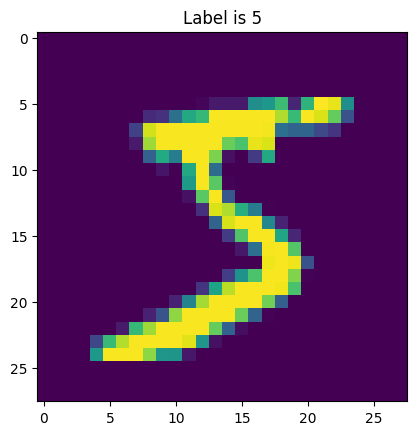

In [27]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


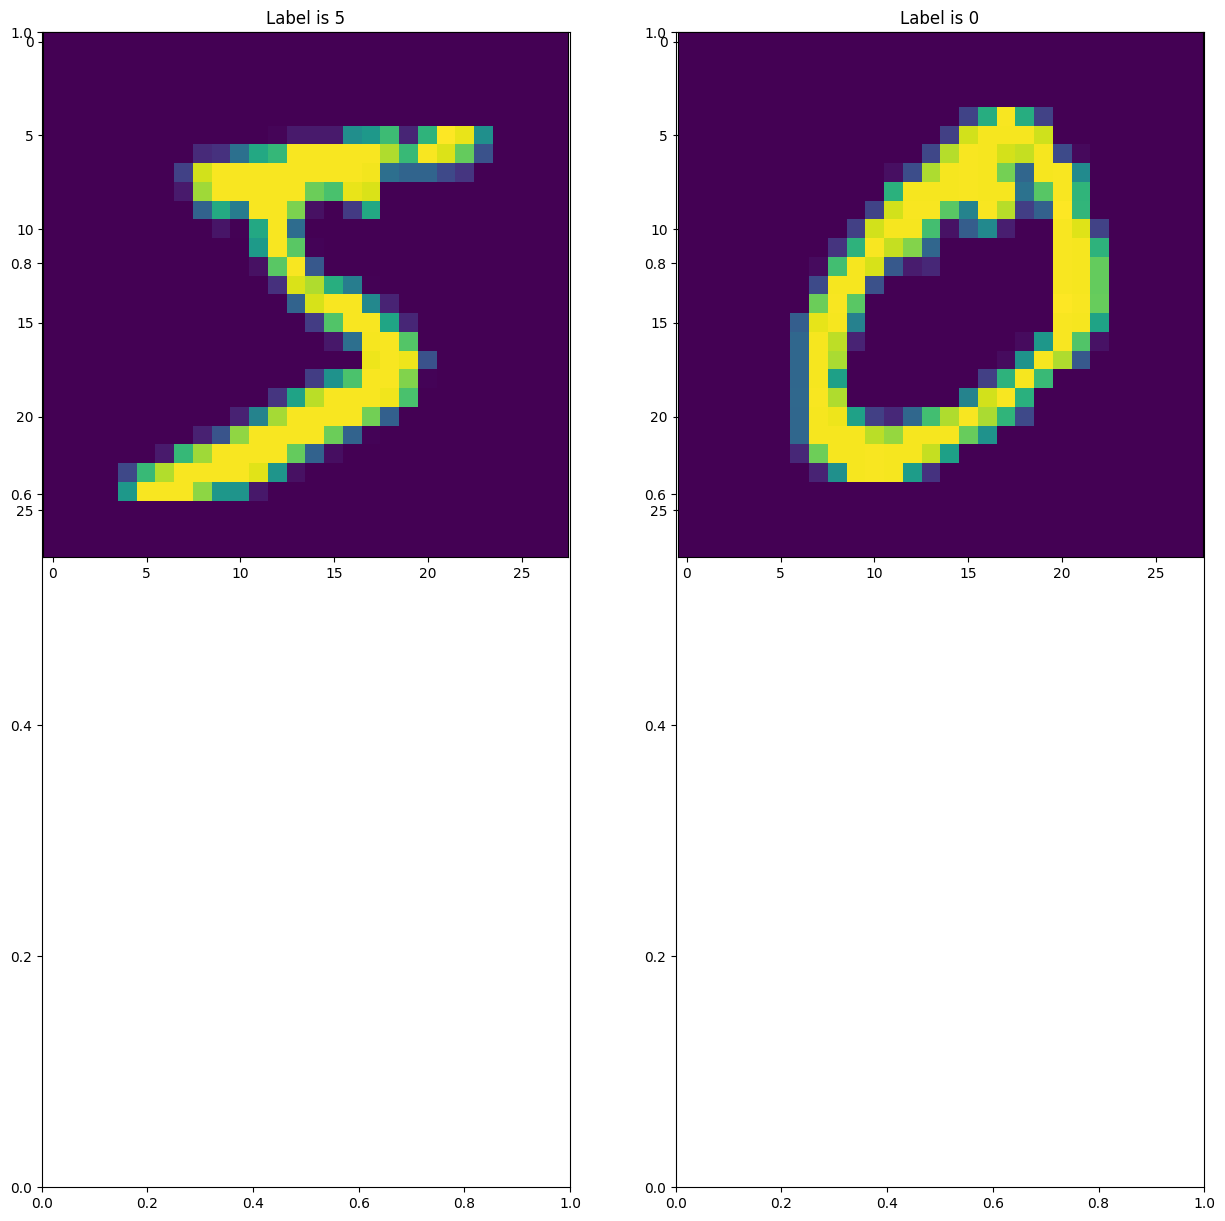

In [28]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [29]:
28*28

784

In [30]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [31]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [32]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.2649


In [33]:
imagefilenames = [f for f in listdir("../our_dataset") if isfile(join("../our_dataset", f))]
images = []
samples = []

for imagename in imagefilenames:
    with PIL.Image.open("../our_dataset/" + imagename) as im:
        image_array = np.array(im)
        images.append(image_array)
        x, y = image_array.shape[:2]
        samples.append([len(imagefilenames), x, y, 3])

samples = np.array(samples, dtype=int)
images = np.array(images)


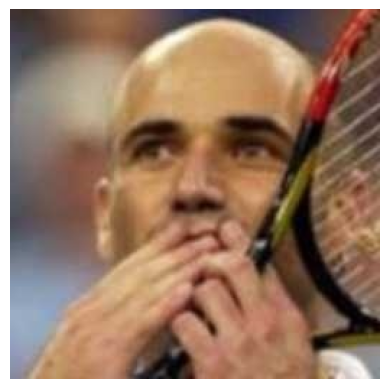

In [34]:
def PlotSample(index: int):
    plt.imshow(images[index]) 
    plt.axis('off')      
    plt.show()

PlotSample(8)

In [72]:
#task 1.2
data = np.load('vecs.npy', allow_pickle=True).item()

vector_list = []
label_list = []
position_list = []
index_list = []

for position in data.keys():
    position_list.append(position)

chosen_position = random.choice(position_list)
print("Chosen position: ", chosen_position)

for digit in data[chosen_position].keys():                 #extract embedding from dictionary                  
    for vector_element in data[chosen_position][digit]:
        vector_list.append(vector_element)
        label_list.append(digit)

print("Total vectors collected: ", len(vector_list)) 
print("Total labels collected: ", len(label_list))

vector_arr = np.vstack(vector_list)
label_arr = np.array(label_list)

print("Before shuffle:")          
print("vector_arr shape: ", vector_arr.shape) 
print("label_arr shape: ", label_arr.shape)
print(" First 10 labels: ", label_arr[:10])

index_list = np.arange(len(vector_list))                  #shuffle arrays
random.shuffle(index_list)

vector_arr = vector_arr[index_list]
label_arr = label_arr[index_list]

print("AFTER shuffle:")
print("vector_arr shape: ", vector_arr.shape) 
print("label_arr shape: ", label_arr.shape)    
print("First 10 labels: ", label_arr[:10])     



Chosen position: 4_pos
Total vectors collected: 1260
Total labels collected: 1260
BEFORE shuffle:
  vector_arr shape: (1260, 1024)
  label_arr shape: (1260,)
  First 10 labels: [0 0 0 0 0 0 0 0 0 0]
AFTER shuffle:
  vector_arr shape: (1260, 1024)
  label_arr shape: (1260,)
  First 10 labels: [1 8 6 9 0 6 9 2 9 8]
Dimensionality of vectors: (1260, 1024)
Dimensionality of labels: (1260,)
First 10 labels: [1 8 6 9 0 6 9 2 9 8]
First vector (first 10 values): [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.15548815e-29  3.81172829e+01 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


In [49]:
print(data.keys())       # e.g., dict_keys([0,1,2,3,4,5,6,7,8])
pos = "1_pos"
position_data = data[pos]
print(position_data.keys())

print(type(position_data[0])) 
print(type(position_data[0][0])) # numpy.ndarray
print(position_data[0][0].shape) # (1024,)

dict_keys(['1_pos', '2_pos', '3_pos', '4_pos', '5_pos', '6_pos', '7_pos', '8_pos', '9_pos'])
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
<class 'list'>
<class 'numpy.ndarray'>
(1024,)
